<a href="https://colab.research.google.com/github/ugurdonmez/bitcoin_price_predict/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/case_3_bitcoin

/content/drive/MyDrive/Colab Notebooks/case_3_bitcoin


In [ ]:
dataset = pd.read_csv('Bitstamp_BTCUSD_minute.csv')

In [ ]:
dataset

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1621060980,2021-05-15 06:43:00,BTC/USD,49091.75,49091.75,49091.75,49091.75,0.002380,116.838365
1,1621060920,2021-05-15 06:42:00,BTC/USD,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826
2,1621060860,2021-05-15 06:41:00,BTC/USD,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761
3,1621060800,2021-05-15 06:40:00,BTC/USD,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033
4,1621060740,2021-05-15 06:39:00,BTC/USD,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433
...,...,...,...,...,...,...,...,...,...
211165,1606032060,2020-11-22 08:01:00,BTC/USD,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414
211166,1606032000,2020-11-22 08:00:00,BTC/USD,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629
211167,1606031940,2020-11-22 07:59:00,BTC/USD,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037
211168,1606031880,2020-11-22 07:58:00,BTC/USD,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479


In [ ]:
dataset.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [ ]:
dataset

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1621060980,2021-05-15 06:43:00,BTC/USD,49091.75,49091.75,49091.75,49091.75,0.002380,116.838365
1,1621060920,2021-05-15 06:42:00,BTC/USD,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826
2,1621060860,2021-05-15 06:41:00,BTC/USD,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761
3,1621060800,2021-05-15 06:40:00,BTC/USD,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033
4,1621060740,2021-05-15 06:39:00,BTC/USD,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433
...,...,...,...,...,...,...,...,...,...
211165,1606032060,2020-11-22 08:01:00,BTC/USD,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414
211166,1606032000,2020-11-22 08:00:00,BTC/USD,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629
211167,1606031940,2020-11-22 07:59:00,BTC/USD,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037
211168,1606031880,2020-11-22 07:58:00,BTC/USD,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479


In [ ]:
data_frame = dataset.iloc[::-1]
data_frame = data_frame.sort_index(ascending=True, axis=0)
data_frame = data_frame.reindex(index=data_frame.index[::-1])
data_frame.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
211169,1606031820,2020-11-22 07:57:00,BTC/USD,18494.17,18511.57,18485.07,18511.57,1.471611,27241.827263
211168,1606031880,2020-11-22 07:58:00,BTC/USD,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479
211167,1606031940,2020-11-22 07:59:00,BTC/USD,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037
211166,1606032000,2020-11-22 08:00:00,BTC/USD,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629
211165,1606032060,2020-11-22 08:01:00,BTC/USD,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414


In [ ]:
data_frame

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
211169,1606031820,2020-11-22 07:57:00,BTC/USD,18494.17,18511.57,18485.07,18511.57,1.471611,27241.827263
211168,1606031880,2020-11-22 07:58:00,BTC/USD,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479
211167,1606031940,2020-11-22 07:59:00,BTC/USD,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037
211166,1606032000,2020-11-22 08:00:00,BTC/USD,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629
211165,1606032060,2020-11-22 08:01:00,BTC/USD,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414
...,...,...,...,...,...,...,...,...,...
4,1621060740,2021-05-15 06:39:00,BTC/USD,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433
3,1621060800,2021-05-15 06:40:00,BTC/USD,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033
2,1621060860,2021-05-15 06:41:00,BTC/USD,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761
1,1621060920,2021-05-15 06:42:00,BTC/USD,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826


In [ ]:
data_frame.to_csv('fixed.csv', index=False)

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks/case_3_bitcoin


In [ ]:
!ls

Bitstamp_BTCUSD_minute.csv  BTC-USD.csv		  fixed.csv
BitstampData_sample.csv     case_3_bitcoin.ipynb


In [ ]:
data = pd.read_csv('fixed.csv')

In [ ]:
data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1606031820,2020-11-22 07:57:00,BTC/USD,18494.17,18511.57,18485.07,18511.57,1.471611,27241.827263
1,1606031880,2020-11-22 07:58:00,BTC/USD,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479
2,1606031940,2020-11-22 07:59:00,BTC/USD,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037
3,1606032000,2020-11-22 08:00:00,BTC/USD,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629
4,1606032060,2020-11-22 08:01:00,BTC/USD,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414
...,...,...,...,...,...,...,...,...,...
211165,1621060740,2021-05-15 06:39:00,BTC/USD,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433
211166,1621060800,2021-05-15 06:40:00,BTC/USD,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033
211167,1621060860,2021-05-15 06:41:00,BTC/USD,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761
211168,1621060920,2021-05-15 06:42:00,BTC/USD,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826


In [ ]:
data['short_mavg'] = data['close'].rolling(window=10, min_periods=1, center=False).mean()

In [ ]:
data['long_mavg'] = data['close'].rolling(window=60, min_periods=1, center=False).mean()

In [ ]:
data['signal'] = np.where(data['short_mavg'] > data['long_mavg'], 1.0, 0.0)

In [ ]:
data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,signal
0,1606031820,2020-11-22 07:57:00,BTC/USD,18494.17,18511.57,18485.07,18511.57,1.471611,27241.827263,18511.570000,18511.570000,0.0
1,1606031880,2020-11-22 07:58:00,BTC/USD,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479,18514.435000,18514.435000,0.0
2,1606031940,2020-11-22 07:59:00,BTC/USD,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037,18516.616667,18516.616667,0.0
3,1606032000,2020-11-22 08:00:00,BTC/USD,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629,18511.040000,18511.040000,0.0
4,1606032060,2020-11-22 08:01:00,BTC/USD,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414,18511.396000,18511.396000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
211165,1621060740,2021-05-15 06:39:00,BTC/USD,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433,49428.432000,49462.268333,0.0
211166,1621060800,2021-05-15 06:40:00,BTC/USD,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033,49389.514000,49458.347333,0.0
211167,1621060860,2021-05-15 06:41:00,BTC/USD,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761,49342.717000,49454.033833,0.0
211168,1621060920,2021-05-15 06:42:00,BTC/USD,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826,49287.956000,49447.316667,0.0


In [ ]:
data.shape

(211170, 12)

In [ ]:
print('Null Values =',data.isnull().values.any())

Null Values = False


In [ ]:
data = data.drop(columns=['unix'])

In [ ]:
data = data.drop(columns=['symbol'])

In [ ]:
data

,date,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,signal
0,2020-11-22 07:57:00,18494.17,18511.57,18485.07,18511.57,1.471611,27241.827263,18511.570000,18511.570000,0.0
1,2020-11-22 07:58:00,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479,18514.435000,18514.435000,0.0
2,2020-11-22 07:59:00,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037,18516.616667,18516.616667,0.0
3,2020-11-22 08:00:00,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629,18511.040000,18511.040000,0.0
4,2020-11-22 08:01:00,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414,18511.396000,18511.396000,0.0
...,...,...,...,...,...,...,...,...,...,...
211165,2021-05-15 06:39:00,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433,49428.432000,49462.268333,0.0
211166,2021-05-15 06:40:00,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033,49389.514000,49458.347333,0.0
211167,2021-05-15 06:41:00,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761,49342.717000,49454.033833,0.0
211168,2021-05-15 06:42:00,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826,49287.956000,49447.316667,0.0


In [ ]:
def EMA(df, n):
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

In [ ]:
data['EMA10'] = EMA(data, 10)
data['EMA30'] = EMA(data, 30)
data['EMA200'] = EMA(data, 200)
data.tail()

,date,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200
211165,2021-05-15 06:39:00,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433,49428.432,49462.268333,0.0,49352.335057,49387.106945,49595.973984
211166,2021-05-15 06:40:00,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033,49389.514,49458.347333,0.0,49325.299592,49375.270368,49592.070163
211167,2021-05-15 06:41:00,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761,49342.717,49454.033833,0.0,49296.519666,49361.834215,49587.840709
211168,2021-05-15 06:42:00,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826,49287.956,49447.316667,0.0,49265.028818,49346.446201,49583.218613
211169,2021-05-15 06:43:00,49091.75,49091.75,49091.75,49091.75,0.002380,116.838365,49240.798,49440.244833,0.0,49233.523578,49330.014188,49578.328378


In [ ]:
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC

In [ ]:
data['ROC10'] = ROC(data['close'], 10)
data['ROC30'] = ROC(data['close'], 30)

In [ ]:
data.tail(10)

,date,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30
211160,2021-05-15 06:34:00,49536.57,49536.57,49386.39,49415.56,0.778041,38447.338636,49507.576,49469.168667,1.0,49491.159106,49430.214247,49612.129989,0.378168,0.041624
211161,2021-05-15 06:35:00,49351.19,49351.19,49305.00,49334.95,0.697152,34393.959556,49518.132,49470.433833,1.0,49462.757451,49424.068167,49609.371979,-0.195644,0.048082
211162,2021-05-15 06:36:00,49343.52,49403.48,49300.00,49300.00,0.605602,29856.202264,49504.966,49469.343833,1.0,49433.165187,49416.063769,49606.293651,-0.331333,-0.078498
211163,2021-05-15 06:37:00,49300.00,49305.00,49234.84,49256.91,0.566644,27911.141376,49484.268,49466.610000,1.0,49401.118789,49405.795784,49602.817197,-0.528147,-0.220537
211164,2021-05-15 06:38:00,49240.55,49354.67,49240.55,49296.14,0.688513,33941.039648,49462.038,49465.082000,0.0,49382.031737,49398.721217,49599.765683,-0.521887,-0.145560
211165,2021-05-15 06:39:00,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433,49428.432,49462.268333,0.0,49352.335057,49387.106945,49595.973984,-0.754383,-0.392007
211166,2021-05-15 06:40:00,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033,49389.514,49458.347333,0.0,49325.299592,49375.270368,49592.070163,-0.869024,-0.528333
211167,2021-05-15 06:41:00,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761,49342.717,49454.033833,0.0,49296.519666,49361.834215,49587.840709,-1.014517,-0.482015
211168,2021-05-15 06:42:00,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826,49287.956,49447.316667,0.0,49265.028818,49346.446201,49583.218613,-0.887773,-0.465624
211169,2021-05-15 06:43:00,49091.75,49091.75,49091.75,49091.75,0.002380,116.838365,49240.798,49440.244833,0.0,49233.523578,49330.014188,49578.328378,-0.655279,-0.343497


In [ ]:
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM
  

In [ ]:
data['MOM10'] = MOM(data['close'], 10)
data['MOM30'] = MOM(data['close'], 30)

In [ ]:
data.tail(10)

,date,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30
211160,2021-05-15 06:34:00,49536.57,49536.57,49386.39,49415.56,0.778041,38447.338636,49507.576,49469.168667,1.0,49491.159106,49430.214247,49612.129989,0.378168,0.041624,204.29,-61.95
211161,2021-05-15 06:35:00,49351.19,49351.19,49305.00,49334.95,0.697152,34393.959556,49518.132,49470.433833,1.0,49462.757451,49424.068167,49609.371979,-0.195644,0.048082,105.56,-60.05
211162,2021-05-15 06:36:00,49343.52,49403.48,49300.00,49300.00,0.605602,29856.202264,49504.966,49469.343833,1.0,49433.165187,49416.063769,49606.293651,-0.331333,-0.078498,-131.66,-11.24
211163,2021-05-15 06:37:00,49300.00,49305.00,49234.84,49256.91,0.566644,27911.141376,49484.268,49466.610000,1.0,49401.118789,49405.795784,49602.817197,-0.528147,-0.220537,-206.98,-81.82
211164,2021-05-15 06:38:00,49240.55,49354.67,49240.55,49296.14,0.688513,33941.039648,49462.038,49465.082000,0.0,49382.031737,49398.721217,49599.765683,-0.521887,-0.145560,-222.30,-69.64
211165,2021-05-15 06:39:00,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433,49428.432,49462.268333,0.0,49352.335057,49387.106945,49595.973984,-0.754383,-0.392007,-336.06,-149.30
211166,2021-05-15 06:40:00,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033,49389.514,49458.347333,0.0,49325.299592,49375.270368,49592.070163,-0.869024,-0.528333,-389.18,-208.76
211167,2021-05-15 06:41:00,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761,49342.717,49454.033833,0.0,49296.519666,49361.834215,49587.840709,-1.014517,-0.482015,-467.97,-297.97
211168,2021-05-15 06:42:00,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826,49287.956,49447.316667,0.0,49265.028818,49346.446201,49583.218613,-0.887773,-0.465624,-547.61,-281.83
211169,2021-05-15 06:43:00,49091.75,49091.75,49091.75,49091.75,0.002380,116.838365,49240.798,49440.244833,0.0,49233.523578,49330.014188,49578.328378,-0.655279,-0.343497,-471.58,-261.37


In [ ]:
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)

In [ ]:
data['RSI10'] = RSI(data['close'], 10)
data['RSI30'] = RSI(data['close'], 30)
data['RSI200'] = RSI(data['close'], 200)

In [ ]:
def STOK(close, low, high, n): 
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

In [ ]:
def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

In [ ]:
data['%K10'] = STOK(data['close'], data['low'], data['high'], 10)
data['%D10'] = STOD(data['close'], data['low'], data['high'], 10)
data['%K30'] = STOK(data['close'], data['low'], data['high'], 30)
data['%D30'] = STOD(data['close'], data['low'], data['high'], 30)
data['%K200'] = STOK(data['close'], data['low'], data['high'], 200)
data['%D200'] = STOD(data['close'], data['low'], data['high'], 200)

In [ ]:
data

,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
0,18494.17,18511.57,18485.07,18511.57,1.471611,27241.827263,18511.570000,18511.570000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18504.96,18517.30,18504.57,18517.30,1.535443,28432.253479,18514.435000,18514.435000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18521.33,18527.41,18511.13,18520.98,4.143530,76742.234037,18516.616667,18516.616667,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18511.86,18519.25,18494.31,18494.31,3.089814,57143.974629,18511.040000,18511.040000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18493.49,18512.82,18493.49,18512.82,1.200447,22223.664414,18511.396000,18511.396000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211165,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433,49428.432000,49462.268333,0.0,49352.335057,49387.106945,49595.973984,-0.754383,-0.392007,-336.06,-149.30,36.005034,43.663897,47.137164,0.811528,6.643047,31.604658,37.434967,21.186836,25.095304,49428.432,49348.626333,49591.33760
211166,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033,49389.514000,49458.347333,0.0,49325.299592,49375.270368,49592.070163,-0.869024,-0.528333,-389.18,-208.76,35.055464,43.253778,47.062690,2.350901,5.739720,29.326981,34.749445,19.659948,23.295009,49389.514,49341.667667,49588.17850
211167,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761,49342.717000,49454.033833,0.0,49296.519666,49361.834215,49587.840709,-1.014517,-0.482015,-467.97,-297.97,32.723143,42.255152,46.881627,2.580857,1.914429,23.787054,28.239564,15.946143,18.930976,49342.717,49331.735333,49584.66235
211168,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826,49287.956000,49447.316667,0.0,49265.028818,49346.446201,49583.218613,-0.887773,-0.465624,-547.61,-281.83,30.071638,41.084768,46.666409,6.198765,3.710174,17.179371,23.431135,11.516546,15.707546,49287.956,49322.341000,49580.92705


In [ ]:
def MA(df, n):
    MA = pd.Series(df['close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA

In [ ]:
data['MA21'] = MA(data, 10)
data['MA63'] = MA(data, 30)
data['MA252'] = MA(data, 200)
data.tail()

,date,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
211165,2021-05-15 06:39:00,49282.50,49339.50,49215.00,49218.70,1.289475,63466.267433,49428.432,49462.268333,0.0,49352.335057,49387.106945,49595.973984,-0.754383,-0.392007,-336.06,-149.30,36.005034,43.663897,47.137164,None,6.643047,None,37.434967,None,25.095304,49428.432,49348.626333,49591.33760
211166,2021-05-15 06:40:00,49218.46,49233.72,49192.39,49203.64,0.909304,44741.044033,49389.514,49458.347333,0.0,49325.299592,49375.270368,49592.070163,-0.869024,-0.528333,-389.18,-208.76,35.055464,43.253778,47.062690,None,5.739720,None,34.749445,None,23.295009,49389.514,49341.667667,49588.17850
211167,2021-05-15 06:41:00,49153.71,49208.26,49153.66,49167.01,0.646974,31809.798761,49342.717,49454.033833,0.0,49296.519666,49361.834215,49587.840709,-1.014517,-0.482015,-467.97,-297.97,32.723143,42.255152,46.881627,None,1.914429,None,28.239564,None,18.930976,49342.717,49331.735333,49584.66235
211168,2021-05-15 06:42:00,49125.00,49159.86,49088.99,49123.32,0.725619,35644.814826,49287.956,49447.316667,0.0,49265.028818,49346.446201,49583.218613,-0.887773,-0.465624,-547.61,-281.83,30.071638,41.084768,46.666409,None,3.710174,None,23.431135,None,15.707546,49287.956,49322.341000,49580.92705
211169,2021-05-15 06:43:00,49091.75,49091.75,49091.75,49091.75,0.002380,116.838365,49240.798,49440.244833,0.0,49233.523578,49330.014188,49578.328378,-0.655279,-0.343497,-471.58,-261.37,28.234795,40.251385,46.511347,None,3.132091,None,17.790381,None,11.926150,49240.798,49313.628667,49577.16945


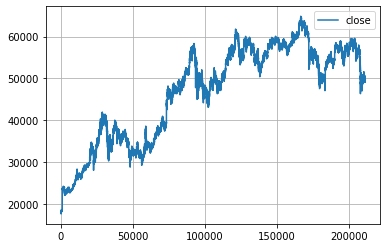

In [ ]:
data[['close']].plot(grid=True)
plt.show()

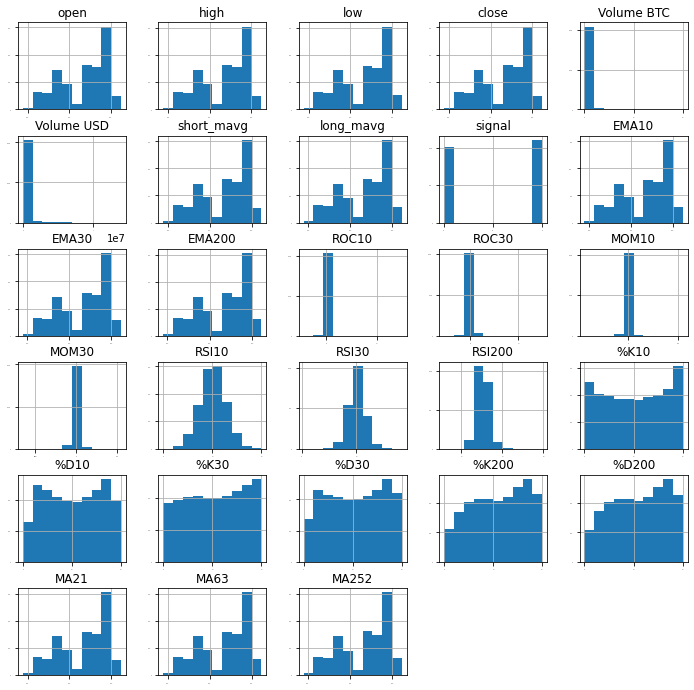

In [ ]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

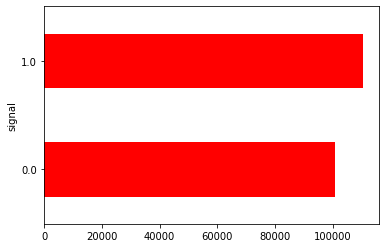

In [ ]:
fig = plt.figure()
plot = data.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

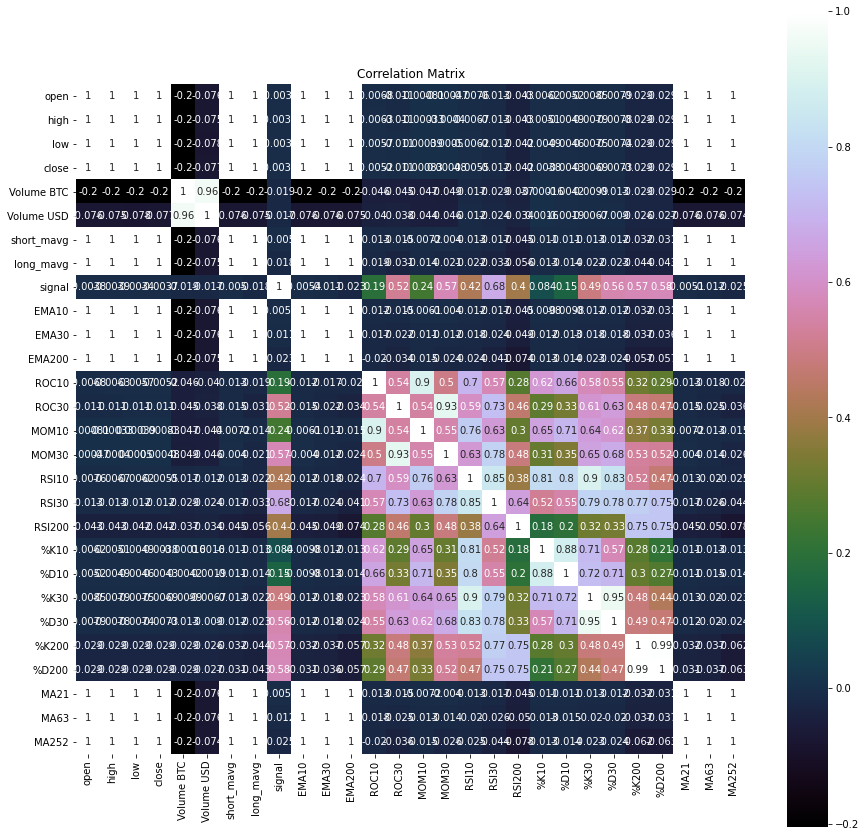

In [ ]:
correlation = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
data = data.drop(columns=['date'])

In [ ]:
# split out validation dataset for the end
subset_dataset= data.iloc[-10000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, data.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [ ]:
X_train

,open,high,low,close,Volume BTC,Volume USD,short_mavg,long_mavg,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
203864,59258.57,59282.25,59258.57,59262.82,1.264192,74919.601313,59267.166,59279.390500,59264.345386,59265.154605,59099.740930,-0.054945,-0.007171,-18.64,-5.55,49.416855,49.802340,53.324084,30.681174,20.864394,44.845610,41.717594,62.391518,61.531403,59267.166,59255.406000,59115.24805
206310,56733.26,56734.31,56696.95,56696.95,0.176016,9979.544271,56784.150,56813.911167,56763.663350,56782.204413,56689.801004,-0.230608,-0.110184,-130.17,-103.05,31.674197,43.983032,51.432472,0.000000,3.403415,17.781017,32.607749,57.625371,62.163715,56784.150,56765.879000,56723.55800
203738,59069.80,59131.88,59063.20,59091.26,10.655867,629668.632241,58968.403,58853.527167,58983.287348,58896.901371,58651.475419,0.342693,0.528097,213.21,333.31,76.387535,62.879925,55.008667,85.334681,91.973439,89.199107,94.179382,96.052363,96.521599,58968.403,58856.965000,58635.48170
204841,55672.68,55681.99,55543.81,55571.14,2.419990,134481.615314,55671.643,55305.828333,55630.769463,55476.505412,56022.473805,-0.153351,0.693825,-24.67,306.47,51.683698,52.776991,46.358902,12.589829,53.854787,82.614233,90.756605,55.215529,57.584668,55671.643,55365.541333,56125.55880
208597,49664.90,49724.16,49647.61,49680.60,3.709581,184294.196415,49653.256,49272.669333,49672.034482,49557.081407,49711.310785,0.294055,0.672336,9.87,340.45,53.825207,54.130586,48.696963,51.979616,70.168561,76.516739,85.232116,68.400036,70.292126,49653.256,49568.820667,49691.39065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204065,58314.67,58321.52,58205.95,58309.77,12.183104,710393.989794,58231.757,58629.286500,58263.813989,58399.948152,58824.457263,0.139812,-0.594611,97.24,-376.96,48.817445,41.959055,46.562800,95.006163,77.737477,37.699002,30.503723,15.806258,13.874020,58231.757,58411.987333,58912.72305
208983,48576.72,48593.10,48376.21,48376.21,2.328765,112656.819359,48721.001,48184.101833,48656.960076,48523.102019,49047.160827,-0.972563,0.366539,-553.65,298.65,37.470302,48.646247,46.872779,0.000000,11.811954,35.713966,56.465151,39.890145,44.619779,48721.001,48531.549333,49265.02155
202075,58764.35,58764.35,58764.35,58764.35,0.008080,474.815948,58718.918,58823.723500,58728.662999,58740.727169,58916.207460,0.148524,0.065014,115.51,80.52,55.969482,48.733529,49.084314,94.765840,82.574147,73.126922,64.126598,19.365927,16.986559,58718.918,58723.905667,58971.28845
206362,56623.64,56666.72,56616.29,56624.20,1.162855,65845.735223,56640.104,56603.356167,56626.267506,56608.820134,56645.833760,-0.010701,0.076439,7.07,6.30,51.743229,49.926367,50.787741,36.837275,36.201421,68.996465,68.281470,39.459864,39.101048,56640.104,56599.799667,56725.83675


In [ ]:
Y_train

203864    0.0
206310    0.0
203738    1.0
204841    1.0
208597    1.0
         ... 
204065    0.0
208983    1.0
202075    0.0
206362    1.0
201405    1.0
Name: signal, Length: 8000, dtype: float64

In [ ]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.968875 (0.021261)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.940750 (0.009155)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.628375 (0.013521)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.909500 (0.010219)
NB: 0.808875 (0.013187)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn'

NN: 0.853750 (0.023271)
AB: 0.933125 (0.005281)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: 0.938125 (0.008240)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.941750 (0.009588)


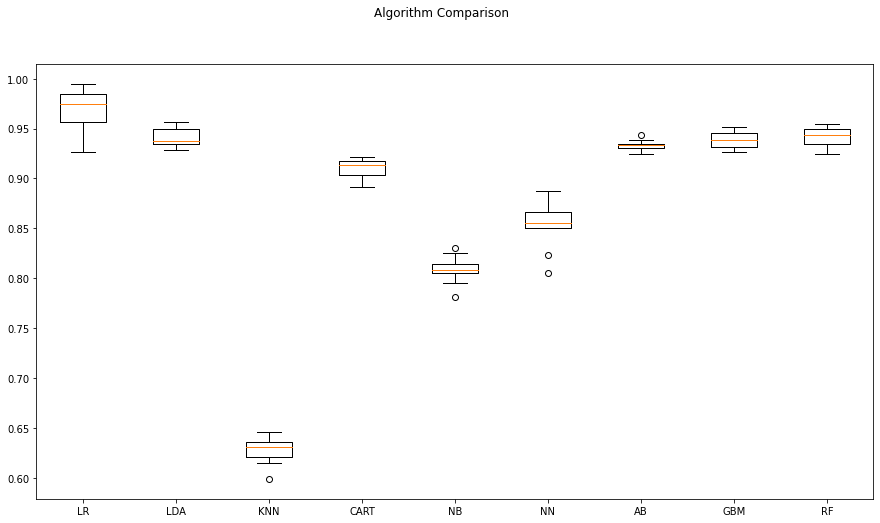

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.937250 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
#8 0.906750 (0.008842) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#5 0.910500 (0.007870) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#4 0.933875 (0.009176) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#2 0.935250 (0.007681) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#6 0.908375 (0.009322) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#7 0.906875 (0.009654) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#3 0.934125 (0.011237) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.937250 (0.008746) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [ ]:
model = RandomForestClassifier(criterion='gini', n_estimators=80,max_depth=10,n_jobs=-1) # rbf is default kernel
#model = LogisticRegression() 
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9255
[[939  69]
 [ 80 912]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      1008
         1.0       0.93      0.92      0.92       992

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



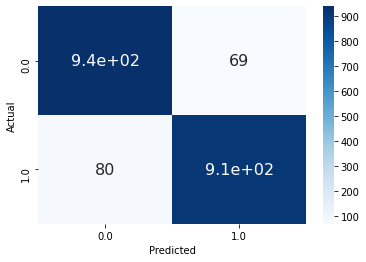

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

Text(0.5, 0, 'Variable Importance')

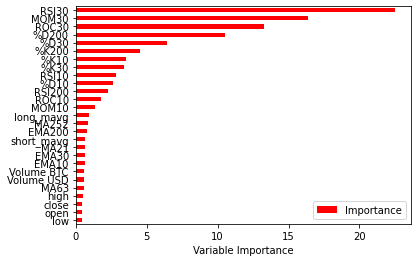

In [ ]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r' )
plt.xlabel('Variable Importance')

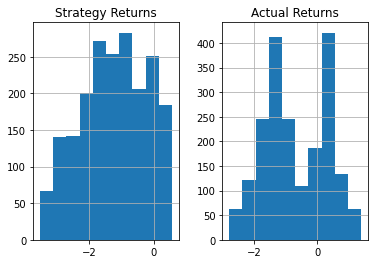

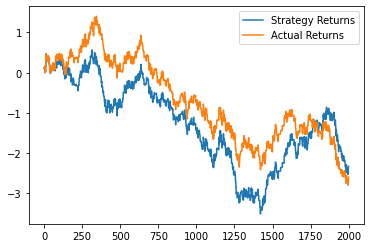

In [ ]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)
#backtestdata = pd.DataFrame()
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()